In [28]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

import sys
sys.path.append('../../')
from src.skmatter.decomposition.pcovc_new import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"

random_state = 0
n_components = 2

In [29]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

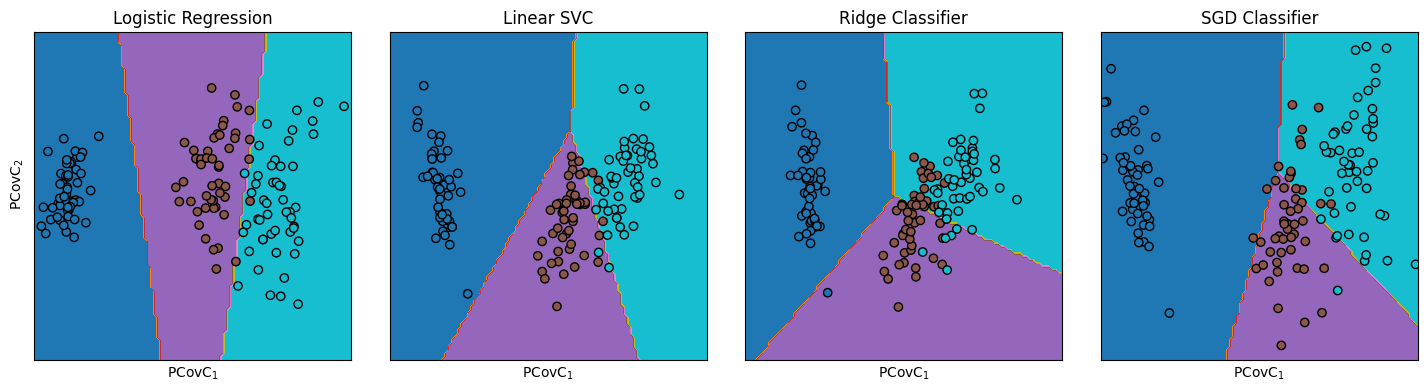

In [30]:
from sklearn.calibration import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import RidgeClassifierCV, SGDClassifier


mixing = 0.50
n_models = 4
fig, axes = plt.subplots(1, n_models, figsize=(4*n_models, 4))

models = {
     LogisticRegressionCV(
         random_state=random_state
    ): "Logistic Regression",

    LinearSVC(
         random_state=random_state
    ): "Linear SVC",

    RidgeClassifierCV(): "Ridge Classifier",

    SGDClassifier(
         random_state=random_state,
         validation_fraction=0.2
    ): "SGD Classifier"  
}

for id, graph in enumerate(axes.flat):
     model = list(models)[id]
    
     pcovc = PCovC(
        mixing=mixing, 
        n_components=n_components, 
        random_state=random_state, 
        classifier=model
     )

     pcovc.fit(X_scaled, y)
     T = pcovc.transform(X_scaled)

     graph = axes.flat[id]
     graph.set_title(models[model])
 
     DecisionBoundaryDisplay.from_estimator(
          estimator=pcovc.classifier_, 
          X=T, 
          ax=graph, 
          #eps=1,
          response_method="predict", 
        #  grid_resolution=3000,
     )
 

    
     graph.set_xlabel("PCovC$_1$")
     graph.scatter(T[:, 0], T[:, 1], c=y)
     graph.set_xticks([])
     graph.set_yticks([])

     
fig.supylabel("PCovC$_2$", fontsize=10)
fig.subplots_adjust(wspace=0.12, hspace=0.05, left=0.035, bottom=0.06)

In [31]:
# bcancer = datasets.load_breast_cancer()
# X, y = bcancer.data, bcancer.target

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.linear_model import LogisticRegression


model_ss = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.5, tol=1e-12, space="sample")
model_fs = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.5, tol=1e-12, space="feature")
np.set_printoptions(threshold=sys.maxsize)

model_ss.fit(X_scaled, y)
model_fs.fit(X_scaled, y)

X_ss = model_ss.transform(X_scaled)
X_fs = model_fs.transform(X_scaled)

r_ss = model_ss.inverse_transform(X_ss)
r_fs = model_fs.inverse_transform(X_fs)

# print(r_ss)
# print(r_fs)
m = r_ss-r_fs
m


array([[-1.32050747e-01, -2.86918455e-01, -2.74755677e-02,
        -4.38645119e-02],
       [ 3.38102483e-01,  7.27530031e-01,  1.09180107e-01,
         1.69539644e-01],
       [ 1.45181392e-01,  3.74812275e-01,  4.10770493e-02,
         7.84469382e-02],
       [ 2.31169255e-01,  5.77859301e-01,  6.23150671e-02,
         1.15837323e-01],
       [-2.30092253e-01, -4.65809306e-01, -6.22526013e-02,
        -9.03281731e-02],
       [-5.60880126e-01, -1.20451719e+00, -1.55371065e-01,
        -2.41661448e-01],
       [-7.48145868e-02, -3.86000373e-02, -3.54414421e-02,
        -2.62892749e-02],
       [-4.29009626e-02, -7.88074836e-02, -4.78654100e-03,
        -4.63951017e-03],
       [ 4.18954588e-01,  1.00927308e+00,  1.12046147e-01,
         1.99791177e-01],
       [ 2.63379901e-01,  5.59857834e-01,  8.91024782e-02,
         1.36619683e-01],
       [-3.16971180e-01, -7.35474268e-01, -7.18881491e-02,
        -1.25116344e-01],
       [-5.17926846e-02, -4.95873626e-02, -1.68745478e-02,
      

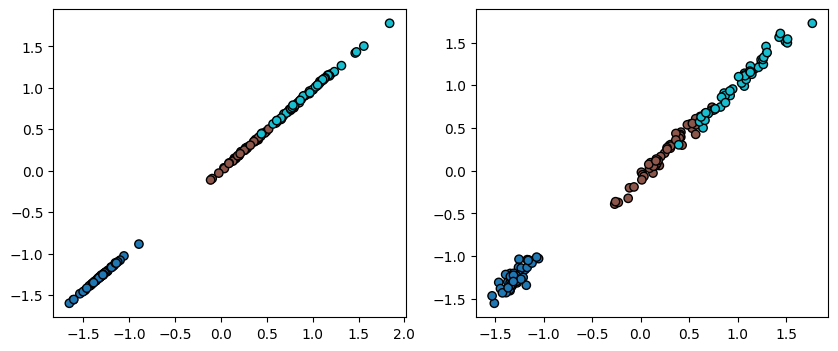

In [33]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(r_ss[:, 2], r_ss[:, 3], c=y)
axis2.scatter(r_fs[:, 2], r_fs[:, 3], c=y)

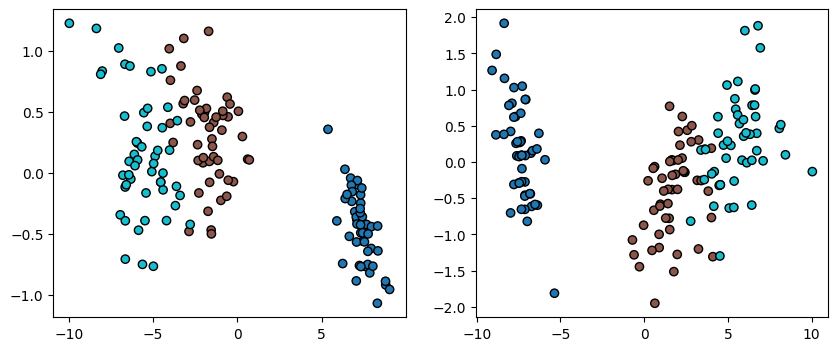

In [34]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(X_ss[:, 0], X_ss[:, 1], c=y)
axis2.scatter(X_fs[:, 0], X_fs[:, 1], c=y)

0.96
(150, 3)
0.96
(4, 3)
(2, 3)
(150, 3)


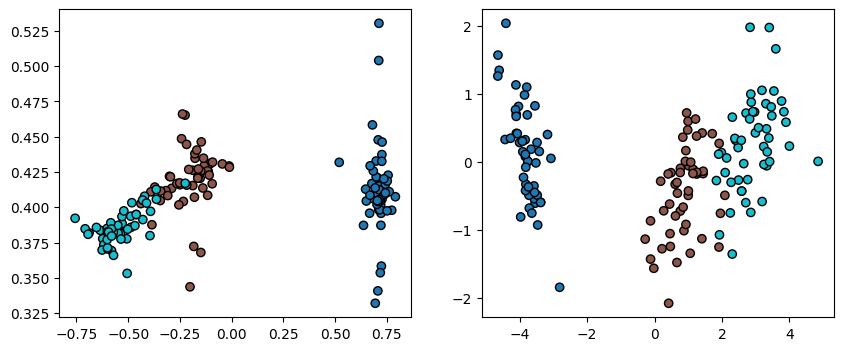

In [ ]:
from sklearn.svm import SVC
from src.skmatter.decomposition.kernel_pcovc_newernel_pcovc import KernelPCovC
from sklearn.metrics import accuracy_score

model = KernelPCovC(mixing=0.5, kernel="sigmoid", gamma=0.1, classifier=SVC(kernel="sigmoid", gamma=0.1), n_components=2, fit_inverse_transform=True)
model.fit(X_scaled, y)
T = model.transform(X_scaled)
y_pred = model.predict(X_scaled)
print(accuracy_score(y, y_pred))
print(model.decision_function(X_scaled).shape)

model2 = PCovC(mixing=0.5, classifier=LinearSVC(), n_components=2)
model2.fit(X_scaled, y)
T_2 = model2.transform(X_scaled)
y_pred_2 = model2.predict(X_scaled)
print(accuracy_score(y, y_pred_2))
print(model2.decision_function(X_scaled).shape)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,4))
axis1.scatter(T[:, 0], T[:, 1], c=y)
axis2.scatter(T_2[:, 0], T_2[:, 1], c=y)
# DecisionBoundaryDisplay.from_estimator(
#           estimator=model.classifier_, 
#           X=T, 
#           ax=axis1, 
#           #eps=1,
#           response_method="predict", 
#      )

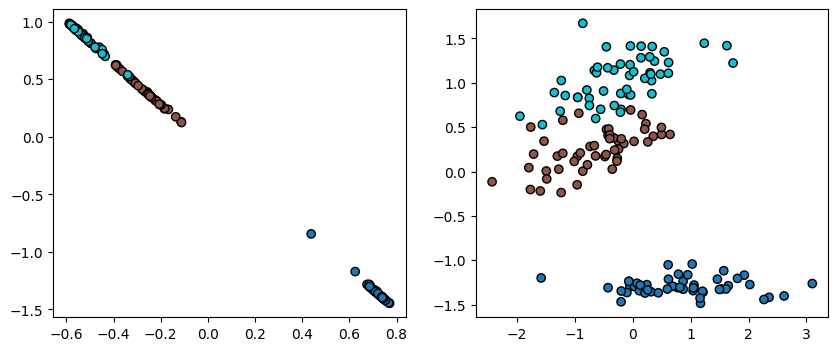

In [36]:
rT = model.inverse_transform(T)
rT2 = model2.inverse_transform(T_2)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,4))
axis1.scatter(rT[:, 1], rT[:, 2], c=y)
axis2.scatter(rT2[:, 1], rT2[:, 2], c=y)
